In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('credit_card_transaction_flow.csv')

In [5]:
df.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Gender_Binary
0,752858,Sean,Rodriguez,F,20-10-2002,35.47,03-04-2023,Smith-Russell,Cosmetic,0.0
1,26381,Michelle,Phelps,NaN,24-10-1985,2552.72,17-07-2023,"Peck, Spence and Young",Travel,NaN
2,305449,Jacob,Williams,M,25-10-1981,115.97,20-09-2023,Steele Inc,Clothing,1.0
3,988259,Nathan,Snyder,M,26-10-1977,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic,1.0
4,764762,Crystal,Knapp,F,02-11-1951,62.21,13-06-2023,Palmer-Hinton,Electronics,0.0


In [6]:
df.dtypes

Customer ID             int64
Name                   object
Surname                object
Gender                 object
Birthdate              object
Transaction Amount    float64
Date                   object
Merchant Name          object
Category               object
Gender_Binary         float64
dtype: object

In [7]:
missing_values = df.isna()

# Sum the missing values in each column
missing_count = missing_values.sum()
print(missing_count)

Customer ID              0
Name                     0
Surname                  0
Gender                5047
Birthdate                0
Transaction Amount       0
Date                     0
Merchant Name            0
Category                 0
Gender_Binary         5047
dtype: int64


In [22]:
df = pd.read_csv('credit_card_transaction_flow.csv')

# Extract unique values from the "Category" column
unique_categories = df['Category'].unique()
unique_categories

array(['Cosmetic', 'Travel', 'Clothing', 'Electronics', 'Restaurant',
       'Market'], dtype=object)

In [9]:
import pandas as pd

# Load the original dataset from 'credit_card_transaction_flow.csv'
original_data = pd.read_csv('credit_card_transaction_flow.csv')

# Define a mapping for binary values (e.g., 'F' as 0 and 'M' as 1)
gender_mapping = {'F': 0, 'M': 1}

# Create a new column for 'Gender_Binary' based on the mapping
original_data['Gender_Binary'] = original_data['Gender'].map(gender_mapping)

# Save the modified dataset 
original_data.to_csv('mean_imputed_credit_card_transaction_flow.csv', index=False)


In [18]:

# Load the DataFrame from 'mean_imputed_credit_card_transaction_flow.csv'
data = pd.read_csv('mean_imputed_credit_card_transaction_flow.csv')

# Calculate the mean of 'Gender_Binary' (including missing values)
mean_gender_binary = data['Gender_Binary'].mean()

# Fill missing values in 'Gender_Binary' with the calculated mean
data['Gender_Binary'].fillna(mean_gender_binary, inplace=True)

# Save the updated DataFrame 
data.to_csv('mean_imputed_credit_card_transaction_flow.csv', index=False)


In [8]:

# Load the original DataFrame from the CSV file
df_original = pd.read_csv('credit_card_transaction_flow.csv')

# Define a mapping for binary values (e.g., 'F' as 0 and 'M' as 1)
gender_mapping = {'F': 0, 'M': 1}

# Create a new column for binary values
df_original['Gender_Binary'] = df_original['Gender'].map(gender_mapping)

# Load the DataFrame after mean imputation
df_mean_imputed = pd.read_csv('mean_imputed_credit_card_transaction_flow.csv')

# Calculate the mean for 'Gender_Binary' before and after mean imputation
mean_before_imputation = df_original['Gender_Binary'].mean()
mean_after_imputation = df_mean_imputed['Gender_Binary'].mean()

# Compare the distributions before and after mean imputation
print("Mean of Gender_Binary before mean imputation:", mean_before_imputation)
print("Mean of Gender_Binary after mean imputation:", mean_after_imputation)


Mean of Gender_Binary before mean imputation: 0.49473894956955045
Mean of Gender_Binary after mean imputation: 0.4947389495695216


#### The means of 'Gender_Binary' before and after mean imputation are very close, indicating that the imputation process did not significantly impact the overall mean of 'Gender_Binary.'The differences are minimal, which is expected since mean imputation replaces missing values with the mean of the available values, trying to maintain the overall distribution of the data.

In [9]:
data = pd.read_csv('mean_imputed_credit_card_transaction_flow.csv')

# Round the 'Gender_Binary' values to the nearest integer (0 or 1)
data['Gender_Binary'] = data['Gender_Binary'].apply(lambda x: round(x))

# Create a new column 'Gender' based on 'Gender_Binary' values
data['Gender'] = data['Gender_Binary'].apply(lambda x: 'F' if x == 0 else 'M')

# Save the updated DataFrame
data.to_csv('rounded_gender_data.csv', index=False)


In [10]:
df1 = pd.read_csv('rounded_gender_data.csv')

In [11]:
gender_counts = df1['Gender'].value_counts()
print(gender_counts)


F    27760
M    22240
Name: Gender, dtype: int64


In [12]:
missing_values = df1.isnull().sum()
print(missing_values)


Customer ID           0
Name                  0
Surname               0
Gender                0
Birthdate             0
Transaction Amount    0
Date                  0
Merchant Name         0
Category              0
Gender_Binary         0
dtype: int64


In [13]:
df1['Date'] = pd.to_datetime(df1['Date'])


In [15]:
import pandas as pd
from datetime import datetime

df1 = pd.read_csv('rounded_gender_data.csv')

# Convert 'Birthdate' to datetime
df1['Birthdate'] = pd.to_datetime(df1['Birthdate'])

# Calculate the age based on the current date
current_date = datetime.now()
df1['Age'] = (current_date - df1['Birthdate']).astype('<m8[Y]')

# Save the DataFrame 
df1.to_csv('rounded_gender_data_with_age.csv', index=False)


In [16]:
df1.head()

,Customer ID,Name,Surname,Gender,Birthdate,Transaction Amount,Date,Merchant Name,Category,Gender_Binary,Age
0,752858,Sean,Rodriguez,F,2002-10-20,35.47,03-04-2023,Smith-Russell,Cosmetic,0,21.0
1,26381,Michelle,Phelps,F,1985-10-24,2552.72,17-07-2023,"Peck, Spence and Young",Travel,0,38.0
2,305449,Jacob,Williams,M,1981-10-25,115.97,20-09-2023,Steele Inc,Clothing,1,42.0
3,988259,Nathan,Snyder,M,1977-10-26,11.31,11-01-2023,"Wilson, Wilson and Russell",Cosmetic,1,46.0
4,764762,Crystal,Knapp,F,1951-02-11,62.21,13-06-2023,Palmer-Hinton,Electronics,0,72.0


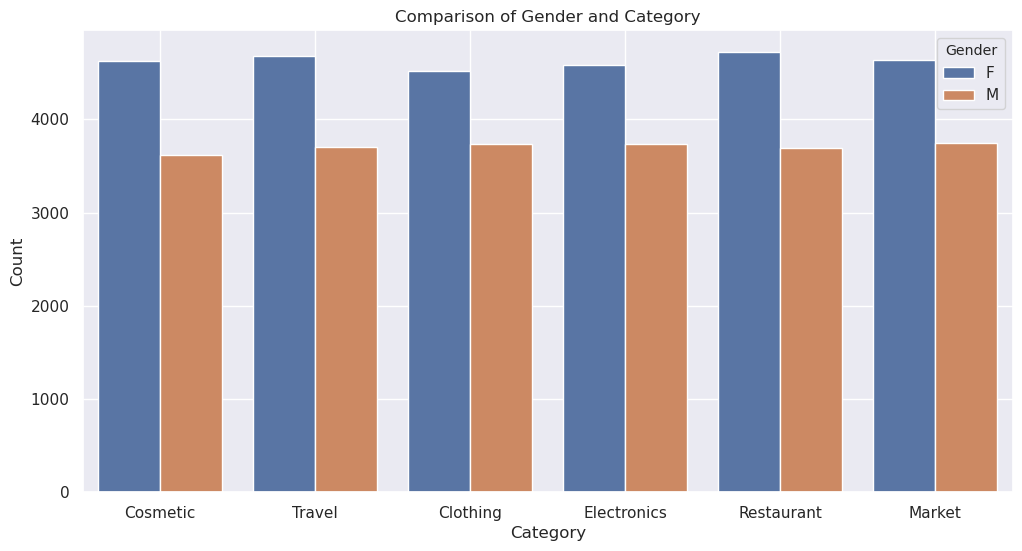

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

#  df1 is  DataFrame
sns.set(style="darkgrid")

# Create a barplot 
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Gender', data=df1)
plt.title('Comparison of Gender and Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()

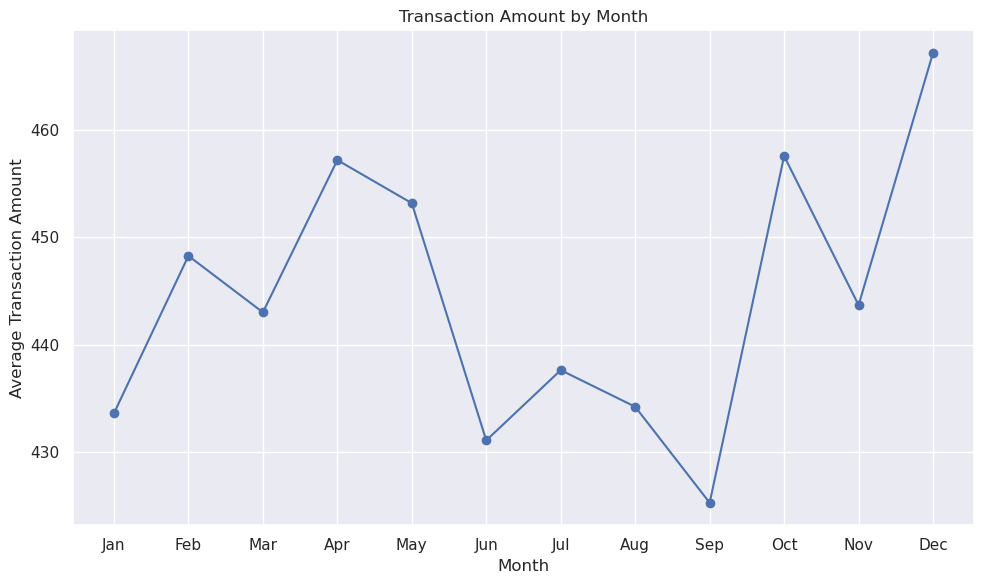

In [46]:

# Ensure 'Date' is in datetime format 
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract the month from the 'Date' column
df1['Month'] = df1['Date'].dt.month

# Group the data by month and calculate the mean of 'Transaction Amount' for each month
monthly_data = df1.groupby('Month')['Transaction Amount'].mean()

# Create a line plot of 'Transaction Amount' by month
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
monthly_data.plot(marker='o')
plt.title('Transaction Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

# Display or save the plot
plt.show()

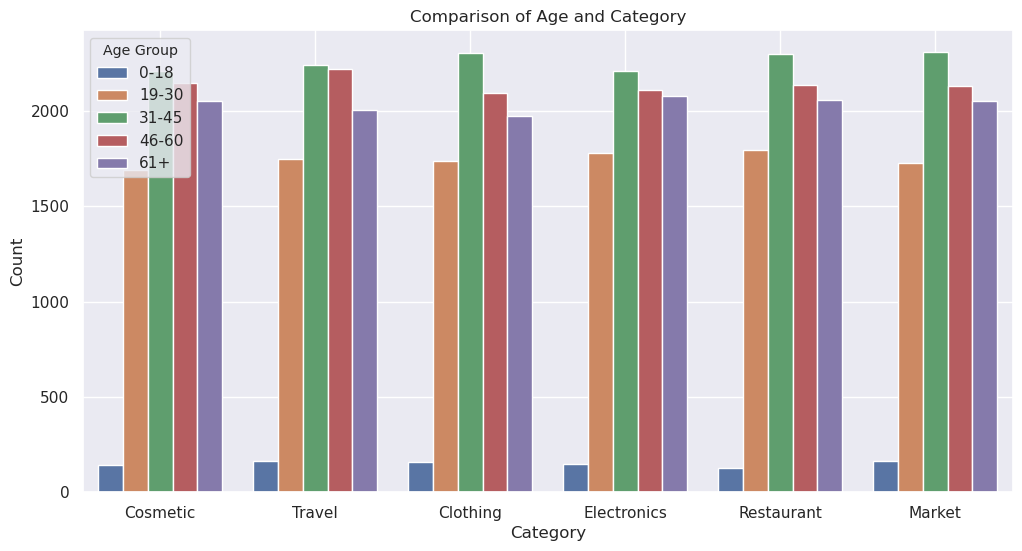

In [34]:

# Create bins for age ranges
age_bins = [0, 18, 30, 45, 60, 100]  

# Assign labels to the age bins
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Add an 'Age Group' column to the DataFrame based on the age bins
df1['Age Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels)

# a barplot to compare 'Age Group' and 'Category'
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.countplot(x='Category', hue='Age Group', data=df1)
plt.title('Comparison of Age and Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()


## Highest credit cards transaction is age range = 31-45
## 31-45 spend most on clothing,restaurant,market 
## 46-60 spend most on Travel 

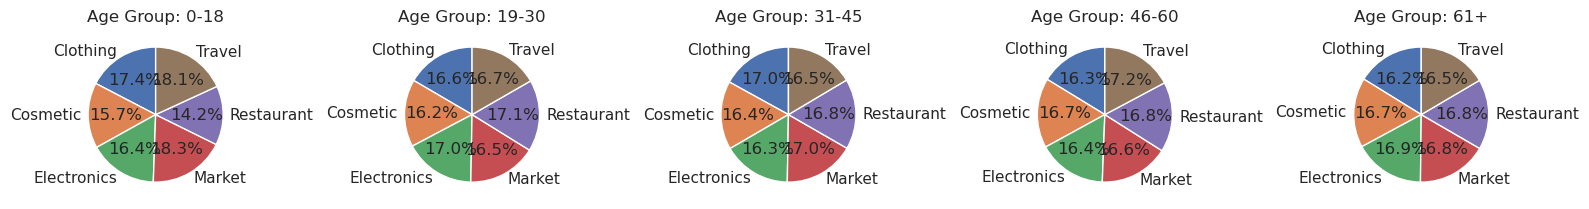

In [21]:


# Create bins for age ranges
age_bins = [0, 18, 30, 45, 60, 100]  # Define age bins
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Add an 'Age Group' column to the DataFrame based on the age bins
df1['Age Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels)

# Group the data by 'Age Group' and 'Category' and count the occurrences
age_category_counts = df1.groupby(['Age Group', 'Category']).size().unstack().fillna(0)

# Create a pie chart for each age group
fig, axes = plt.subplots(1, len(age_labels), figsize=(16, 4))

for i, age_group in enumerate(age_labels):
    ax = axes[i]
    category_counts = age_category_counts.loc[age_group]
    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Age Group: {age_group}')

plt.tight_layout()
plt.show()


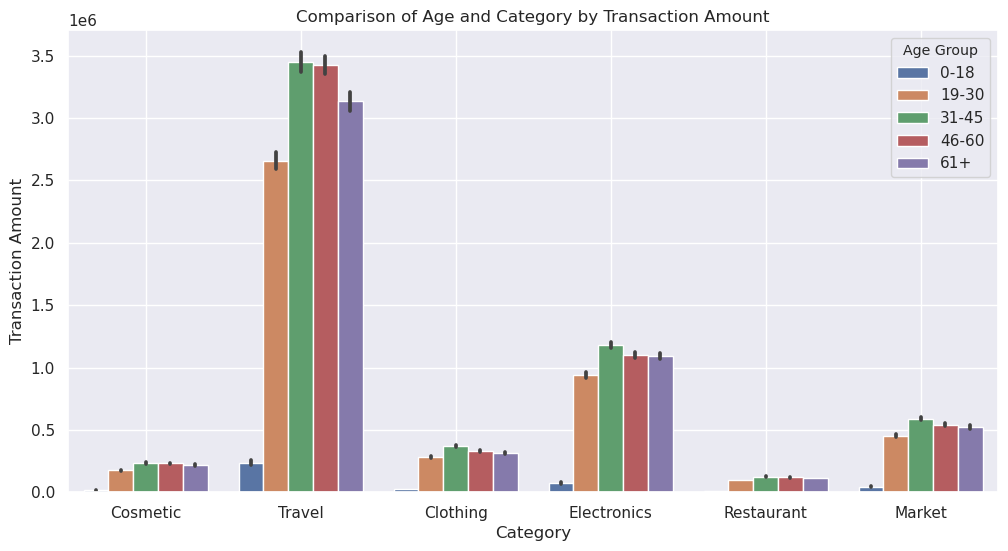

In [39]:

# Create bins for age ranges
age_bins = [0, 18, 30, 45, 60, 100] 

# Assign labels to the age bins
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Add an 'Age Group' column to the DataFrame based on the age bins
df1['Age Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels)

#'Age Group' and 'Category' with 'Transaction Amount' on the y-axis
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Transaction Amount', hue='Age Group', data=df1, estimator=sum)
plt.title('Comparison of Age and Category by Transaction Amount')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()


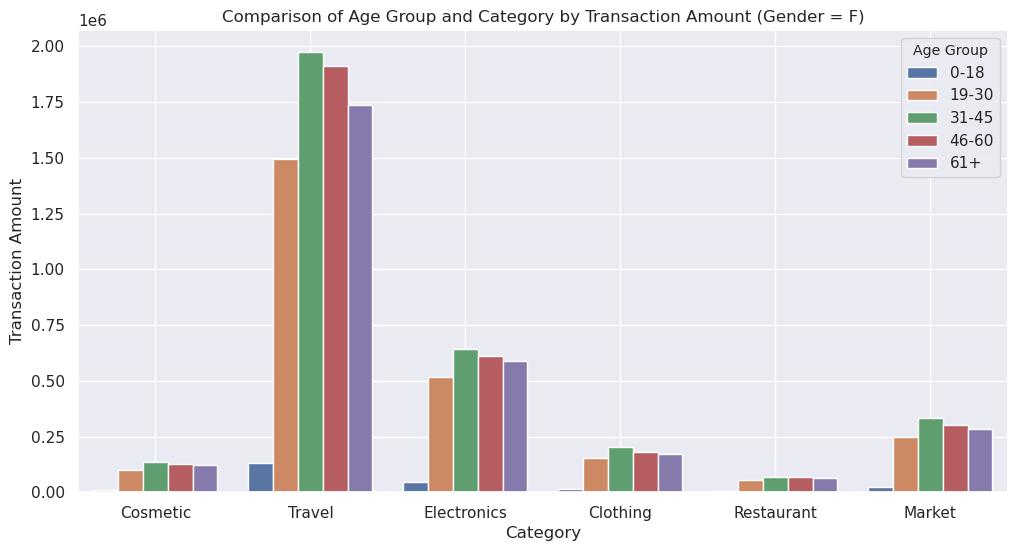

In [42]:

#  df1 is  DataFrame
sns.set(style="darkgrid")

# Create bins for age ranges
age_bins = [0, 18, 30, 45, 60, 100]  # Define your desired age bins

# Assign labels to the age bins
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Add an 'Age Group' column to the DataFrame based on the age bins
df1['Age Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels)

# Filter the DataFrame for Gender = 'F'
df_female = df1[df1['Gender'] == 'F']

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Transaction Amount', hue='Age Group', data=df_female, estimator=sum, ci=None)
plt.title('Comparison of Age Group and Category by Transaction Amount (Gender = F)')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()


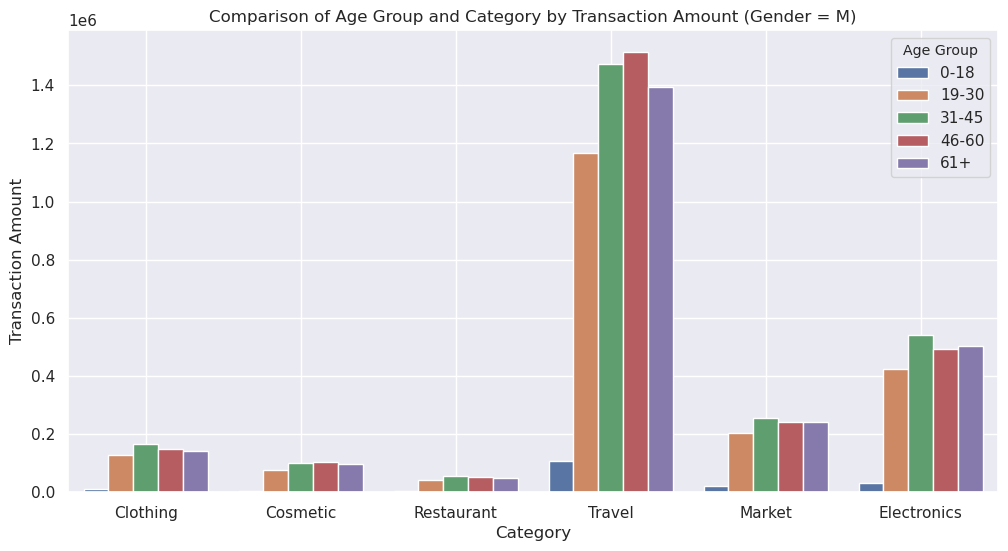

In [45]:

# df1 is  DataFrame
sns.set(style="darkgrid")

# Create bins for age ranges
age_bins = [0, 18, 30, 45, 60, 100]  # Define your desired age bins

# Assign labels to the age bins
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

# Add an 'Age Group' column to the DataFrame based on the age bins
df1['Age Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels)

# Filter the DataFrame for Gender = 'F'
df_M = df1[df1['Gender'] == 'M']

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Transaction Amount', hue='Age Group', data=df_female, estimator=sum, ci=None)
plt.title('Comparison of Age Group and Category by Transaction Amount (Gender = M)')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()


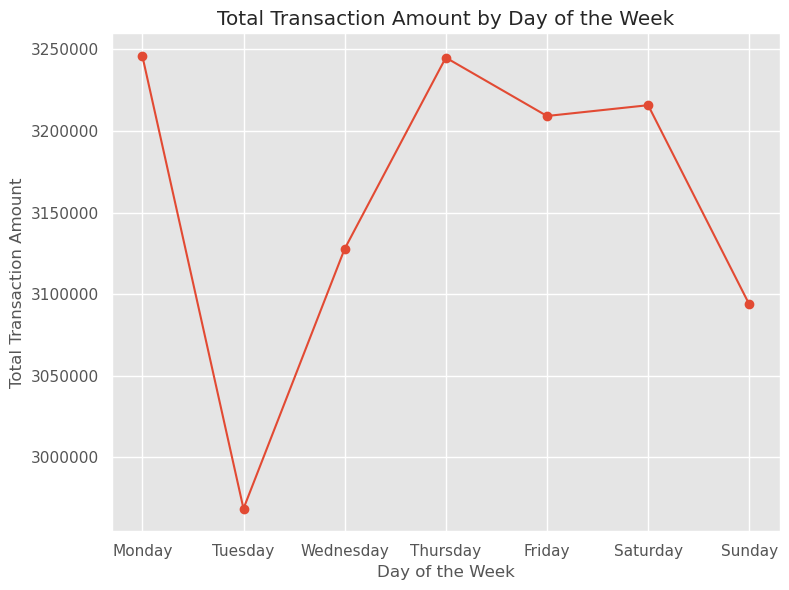

In [8]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Day of Week'] = df1['Date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df1['Day of Week'] = pd.Categorical(df1['Day of Week'], categories=day_order, ordered=True)
total_amount_by_day = df1.groupby('Day of Week')['Transaction Amount'].sum()

plt.style.use('ggplot')

plt.figure(figsize=(8, 6))
plt.plot(total_amount_by_day.index, total_amount_by_day.values, marker='o', linestyle='-')

plt.title('Total Transaction Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Transaction Amount')
plt.ticklabel_format(style='plain', axis='y')  # Display numbers in full format

plt.tight_layout()

# Display the plot
plt.show()

In [17]:
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract the day of the week from the 'Date' column
df1['Day of Week'] = df1['Date'].dt.day_name()

# Filter the data for transactions on Mondays
monday_data = df1[df1['Day of Week'] == 'Monday']

# Find the 5 combinations of AGE, Category, and Gender with the highest transaction amount on Monday
highest_transactions = monday_data.nlargest(5, 'Transaction Amount')

highest_transactions[['Age', 'Category', 'Gender', 'Transaction Amount']]

,Age,Category,Gender,Transaction Amount
19449,61.0,Travel,M,2999.88
48452,35.0,Travel,F,2999.22
13855,45.0,Travel,F,2996.86
40836,53.0,Travel,F,2992.41
34761,48.0,Travel,F,2985.88


In [18]:
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract the day of the week from the 'Date' column
df1['Day of Week'] = df1['Date'].dt.day_name()

# Filter the data for transactions on Fridays
tuesday_data = df1[df1['Day of Week'] == 'Tuesday']

# Find the combination of AGE and Category with the lowest transaction amount on Friday
lowest_transaction = tuesday_data.nsmallest(5, 'Transaction Amount')
lowest_transaction[['Age', 'Category','Gender', 'Transaction Amount']]

,Age,Category,Gender,Transaction Amount
43140,34.0,Market,M,5.36
49987,64.0,Market,F,6.01
1023,23.0,Market,M,7.43
3591,39.0,Market,F,7.93
35837,75.0,Market,M,8.29


# Use Neural Network to predict Gender_Binary

In [24]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv('rounded_gender_data_with_age.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
df1['Merchant Name'] = label_encoder.fit_transform(df1['Merchant Name'])
df1['Category'] = label_encoder.fit_transform(df1['Category'])

# Convert 'Date' to numerical features (e.g., year, month, day)
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day


# Split the dataset 
X = df1[['Age', 'Transaction Amount', 'Merchant Name','Category','Year', 'Month', 'Day']]
y = df1['Gender_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train an MLP classifier model
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nn_model.predict(X_test)


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.5581
Precision: 0.4884758016032064
Recall: 0.5581
F1-score: 0.40153117207506356
Confusion Matrix:
[[5573   12]
 [4407    8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      5585
           1       0.40      0.00      0.00      4415

    accuracy                           0.56     10000
   macro avg       0.48      0.50      0.36     10000
weighted avg       0.49      0.56      0.40     10000



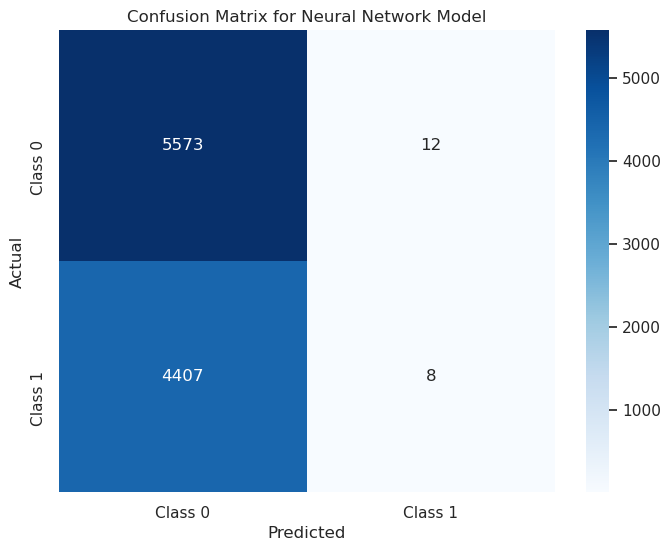

In [29]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nn)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network Model')
plt.show()

# confusion matrix shows
True Positive (TP): 8
True Negative (TN): 5573
False Positive (FP): 12
False Negative (FN): 4407

In general, the model has relatively high accuracy due to a large number of true negatives (TN). However, the model performs poorly in classifying class 1, as indicated by low precision, recall, and F1-score for class 1. This suggests an imbalance in class distribution, and the model struggles to identify class 1 effectively.

Need to address class imbalance and consider other techniques to improve the model's performance, especially in classifying class 1.